In [37]:
import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [38]:
experiment_results_path = Path(os.getcwd()).parent / 'experiment_results'
with_reasons_path = experiment_results_path / 'with-reasons'

with_reasons_gpt3point5_gpt3point5_path = with_reasons_path / 'gpt-3.5-turbo_gpt-3.5-turbo'
with_reasons_gpt4_gpt4_path = with_reasons_path / 'gpt-4_gpt-4'
with_reasons_experiment_paths = [with_reasons_gpt3point5_gpt3point5_path, with_reasons_gpt4_gpt4_path]

random_path = experiment_results_path / 'random'
random_gpt3point5_gpt3point5_path = random_path / 'gpt-3.5-turbo_gpt-3.5-turbo'
random_gpt4_gpt4_path = random_path / 'gpt-4_gpt-4'
random_experiment_paths = [random_gpt3point5_gpt3point5_path, random_gpt4_gpt4_path]

In [39]:
def get_results(results_path):
    experiment_results = {}
    for exp_path in results_path:
        files = [path for path in (exp_path / "outputs" / "evaluation").iterdir() if path.is_file()]
        for file in files:
            with open(file, 'r') as f:
                data = json.load(f)
                if exp_path.name not in experiment_results:
                    experiment_results[exp_path.name] = []
                experiment_results[exp_path.name].append({
                    "trial": int(file.name.replace(".json", "")),
                    "accuracy": data["accuracy"],
                    "total": data["total"],
                    "correct": data["correct"],
                    "incorrect": data["incorrect"],
                })
                
    for exp_path in results_path:
        experiment_results[exp_path.name].sort(key=lambda x: x["trial"])
    return experiment_results

In [68]:
def plot_results(results):
    colors = ["#116A7B", "#7EAA92"]
    fig, ax = plt.subplots(figsize=(10, 5))
    for idx, experiment_path in enumerate(with_reasons_experiment_paths):
        df = pd.DataFrame(results[experiment_path.name])
        df["accuracy"] = df["correct"] / df["total"]
        sns.lineplot(data=df, x="trial", y="accuracy", label=experiment_path.name.split('_')[0], color=colors[idx])
        ax.set_xlabel("Trial")
        ax.set_ylabel("Accuracy")
        ax.set_ylim([0, 1])
        ax.set_xticks(range(0, 10, 1))
        ax.set_yticks([y / 100 for y in range(0, 110, 10)])
        
        max_accuracy = df["accuracy"].max()
        max_accuracy_trial = df[df["accuracy"] == max_accuracy]["trial"].values[0]
        ax.scatter(max_accuracy_trial, max_accuracy, s=50, color=colors[idx])
        ax.lines[-1].set_color(colors[idx])
        ax.annotate(f"{max_accuracy:.2f}", (max_accuracy_trial, max_accuracy), xytext=(max_accuracy_trial - 0.15, max_accuracy + 0.05))
        # ax.axvline(x=max_accuracy_trial, color=colors[idx], linestyle='--')
        
        initial_accuracy = df[df["trial"] == 0]["accuracy"].values[0]
        ax.scatter(0, initial_accuracy, s=50, color=colors[idx], marker='s')
        ax.annotate(f"{initial_accuracy:.2f}", (0, initial_accuracy), xytext=(-0.15, initial_accuracy + 0.05))
        # ax.axhline(y=initial_accuracy, color=colors[idx], linestyle='--')
    ax.legend()
    ax.legend(loc='lower right')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    return fig

In [69]:
reasons_results = get_results(with_reasons_experiment_paths)
random_results = get_results(random_experiment_paths)

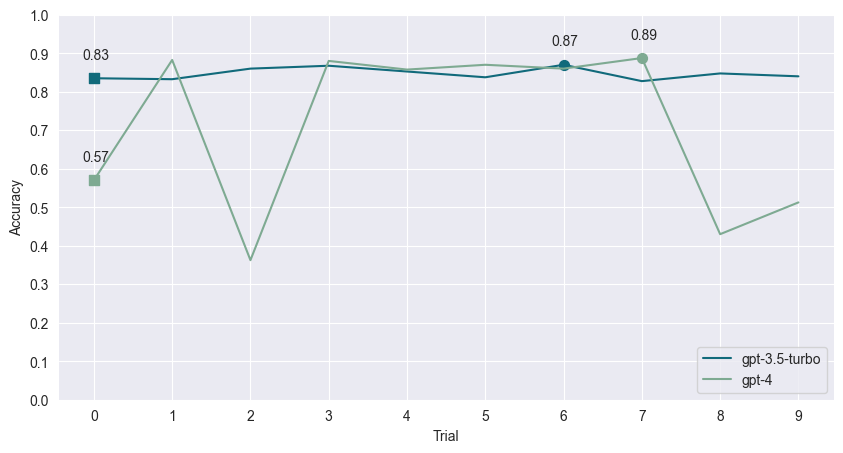

In [72]:
reasons_fig = plot_results(reasons_results)
reasons_fig.savefig("reasons_optimization_graph.png", dpi=300, bbox_inches='tight')

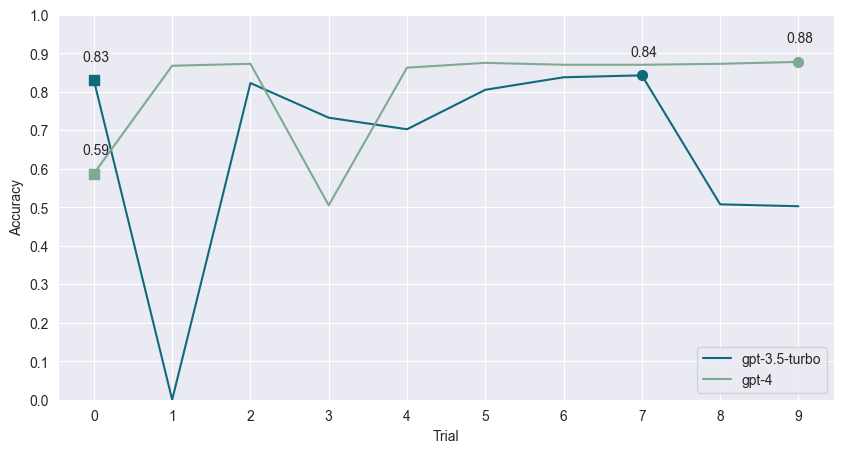

In [73]:
random_fig = plot_results(random_results)
random_fig.savefig("random_optimization_graph.png", dpi=300, bbox_inches='tight')